# Diabetes Health Indicators 

Collaborators: Vihaan Shah, Manan Ambaliya


# Introduction

Being one of the most common chronic diseases globally, diabetes affects millions of people, presenting a major public health challenge. Early recognition of diabetes is critical in preventing complications and improving prognosis. Our team focuses on predicting diabetes probability in patients utilizing various health-related features with the help of different Machine Learning models. Our work aims to develop a strong classification setup that aids healthcare professionals in helping them accurately pinpoint at-risk candidates.

Sophisticated machine-learning techniques like Random Forest Classifier and Support Vector Machine are very useful for dealing with complex data in predictive modeling applications. This project uses the above models to figure out which health indicators generally implicate diabetes risk. Many such features including BMI, age, blood pressure, and cholesterol level are going to be present in the dataset and help in better understanding the performance of the prediction models.

Over this tutorial, we will be going through the Data Science Lifecycle as follows:

1. Data Collection  
2. Data Pre-processing  
3. Exploratory Analysis & Data Visualization  
4. Model Development  
5. Model Evaluation and Validation
6. Interpretation : Insight and Policy Decision 


# Data Collection

The dataset was gathered at the beginning of this project for analysis and prediction of diabetes in a person. This dataset, from a reliable repository, includes a set of health indicators such as BMI, age, blood pressure, cholesterol, and other attributes related to the diagnosis of diabetes. This dataset will form the basis of training machine learning models to predict diabetes with utmost efficiency.

The dataset used is a CSV file known as `diabetes.csv`. It includes information from a variety of individuals in the form of features that are crucial for diabetes prediction. Initial inspection of the data showed no values missing, hence guaranteeing a smooth pre-processing workflow.

Throughout this entire project, data manipulation and analysis have been done in Python programming language and Jupyter Notebook. For handling data and visualization, different libraries were used like Pandas for handling data, NumPy for computations, and Matplotlib for visualization. Using such commands as `.head()`, `.info()`, and `.describe()`, an observation of the structure and the contents of this dataset is to be made to understand its distribution and characteri 


---

*Importing essential libraries for data manipulation, visualization, and machine learnng tasks.*


In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("diabetes.csv" , sep = "," , encoding = 'utf-8')

In [4]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


This function displays the first five rows of the dataset using the `.head()` function. It provides an overview of the features, such as BMI and high Cholesterol levels, that are essential for predicting diabetes.


In [5]:
data.shape

(253680, 22)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

It shows the dataset structure using the .info() function. It provides details about the number of entries, non-null counts, data types for each column, and memory usage of the dataset.

In [7]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# Preprocessing

Data preprocessing is a significant procedure that should be considered in machine learning projects to ensure that the dataset is clean, consistent, and prepared for analysis. Preprocessing will be of much importance in this diabetes prediction project since it might involve problems concerning inconsistent data types, duplicates, and outliers, which might adversely affect the model's performance. In this regard, the processing of data is done to make the machine learning models effectively learn from the dataset, thus providing more accurate and reliable predictions.

**Data Type Conversion**



In [8]:
# Transform the data to integer
data["Diabetes_binary"] = data["Diabetes_012"].astype(int)
data["HighBP"] = data["HighBP"].astype(int)
data["HighChol"] = data["HighChol"].astype(int)
data["CholCheck"] = data["CholCheck"].astype(int)
data["BMI"] = data["BMI"].astype(int)
data["Smoker"] = data["Smoker"].astype(int)
data["Stroke"] = data["Stroke"].astype(int)
data["HeartDiseaseorAttack"] = data["HeartDiseaseorAttack"].astype(int)
data["PhysActivity"] = data["PhysActivity"].astype(int)
data["Fruits"] = data["Fruits"].astype(int) 
data["Veggies"] = data["Veggies"].astype(int)
data["HvyAlcoholConsump"] = data["HvyAlcoholConsump"].astype(int)
data["AnyHealthcare"] = data["AnyHealthcare"].astype(int)
data["NoDocbcCost"] = data["NoDocbcCost"].astype(int)
data["GenHlth"] = data["GenHlth"].astype(int)
data["MentHlth"] = data["MentHlth"].astype(int)
data["PhysHlth"] = data["PhysHlth"].astype(int)
data["DiffWalk"] = data["DiffWalk"].astype(int)
data["Sex"] = data["Sex"].astype(int)
data["Age"] = data["Age"].astype(int)
data["Education"] = data["Education"].astype(int)
data["Income"] =data["Income"].astype(int)
data.drop("Diabetes_012", axis = 1, inplace = True)
data["Diabetes_binary"]= data["Diabetes_binary"].replace({0:0,1:0,2:1})

Most of the features in the dataset were stored as floating-point values, though they were either categorical or binary data. These columns were converted to integers to match their correct data type and to fit the machine learning algorithms, which require purely numerical data.

**Handling Missing Values**

In [9]:
data.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64

The .isnull() and .sum() functions indeed showed no NaN values in the dataset, which gives the assurance that the data is complete and may be used directly for analysis and modeling.

**Identifying Missing Values**

In [10]:
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2
Veggies,2


A count of unique values in each column was done to understand each categorical feature's nature. This step helps verify that binary and categorical features are correctly represented in the dataset.

**Outlier Detection**

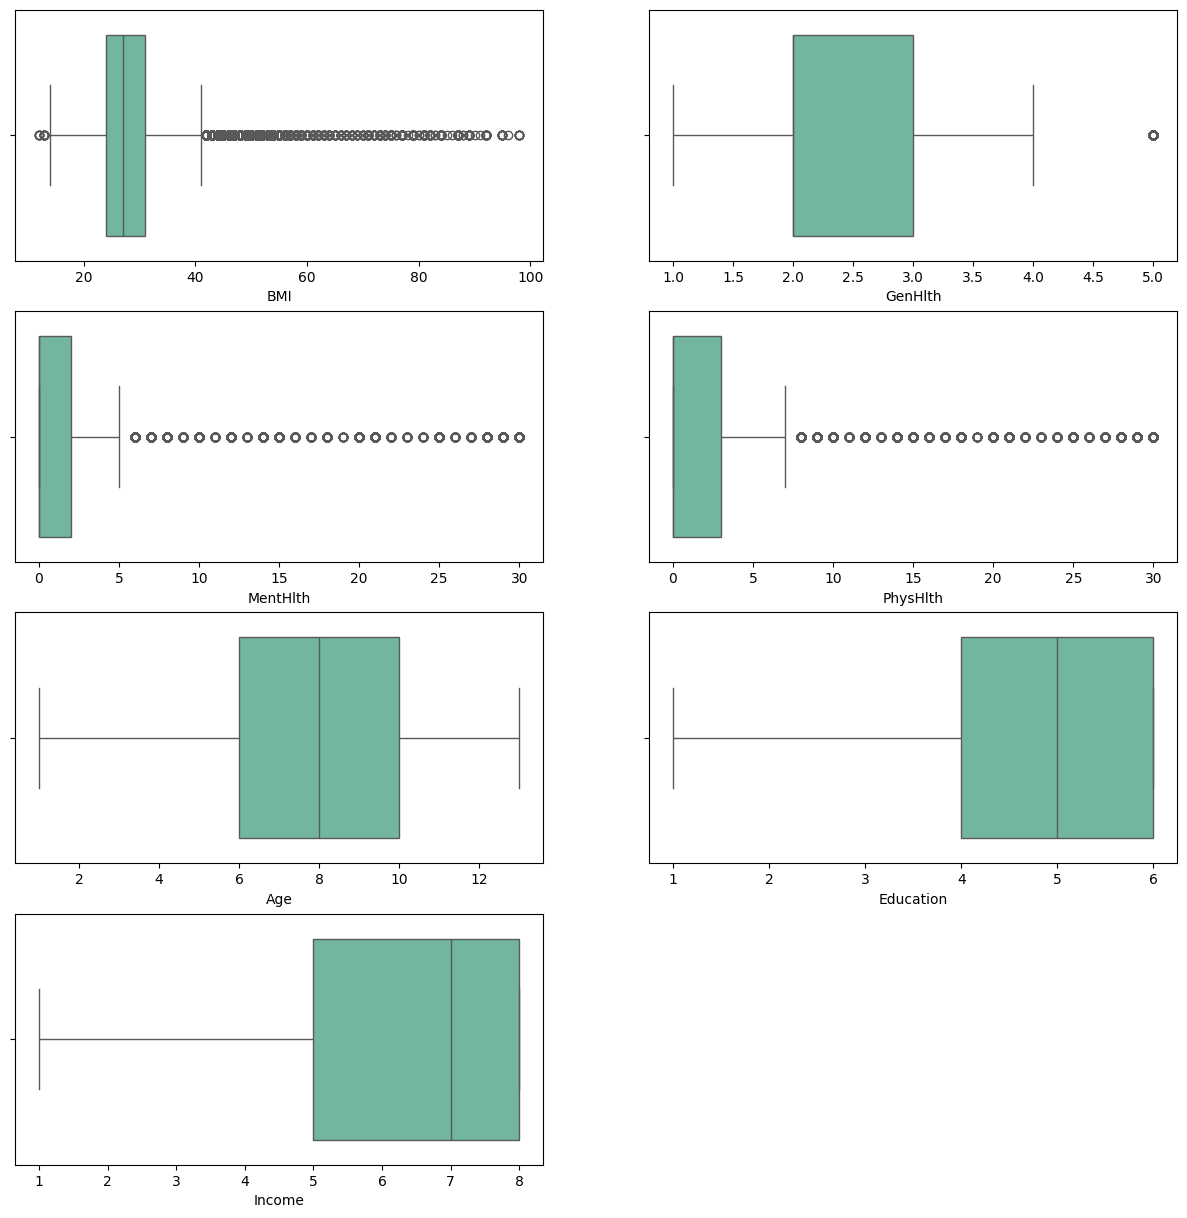

In [11]:
# check the outliers
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data ,palette='Set2')
plt.show()


Boxplots were used to visualize potential outliers in features such as BMI, Age, and Income. While outliers were identified, they were retained as they may carry valuable information about specific conditions affecting diabetes risk.

**Check and drop duplicated data**

In [14]:
data.duplicated().sum()

24206

In [15]:
data.drop_duplicates(inplace = True)

In [16]:
data.duplicated().sum()

0

The dataset contained 24,206 duplicate rows that were removed using the.drop_duplicates() function. It is important to remove the duplicates to avoid overfitting of the model on duplicate data.

In [17]:
data.shape

(229474, 22)

# Exploratory Data Analysis 

EDA helps to explore the structure and pattern of the data. Therefore, this is an essential step for the prediction of diabetes. EDA helps to identify the relationship among the features that include BMI, age, and cholesterol levels, which are one of the major factors of diabetes. EDA helps in viewing the distributions, correlations, and trends of the data to find out the underlying characteristics of the data that significantly affect the outcome. This step not only aids in feature selection but also highlights any anomalies or biases in the dataset, ensuring the models are built on a solid foundation of relevant and clean data. EDA bridges the gap between raw data and meaningful insights for this project, guiding the development of robust machine-learning models.

**Feature Engineering**

In [18]:
#Replacing 0 into Non-Diabetic and 1 into Diabetic 
#adding new column Diabetes_binary_str  

data["Diabetes_binary_str"]= data["Diabetes_binary"].replace({0:"Non-Diabetic",1:"Diabetic"})

The original column 'Diabetes_012' was dropped and replaced with a new column 'Diabetes_binary', where the binary classification of diabetes would be represented as 0: No Diabetes, 1: Diabetes. This now reduces the problem to a binary classification problem suitable for the chosen machine learning models.

In [19]:
#help us to show the categorical variable 
data2 = data.copy()

**Converting numerical values into categorical features**

In [20]:
# That help us to show the relation between features clearly

data2.Age[data2['Age'] == 1] = '18 to 24'
data2.Age[data2['Age'] == 2] = '25 to 29'
data2.Age[data2['Age'] == 3] = '30 to 34'
data2.Age[data2['Age'] == 4] = '35 to 39'
data2.Age[data2['Age'] == 5] = '40 to 44'
data2.Age[data2['Age'] == 6] = '45 to 49'
data2.Age[data2['Age'] == 7] = '50 to 54'
data2.Age[data2['Age'] == 8] = '55 to 59'
data2.Age[data2['Age'] == 9] = '60 to 64'
data2.Age[data2['Age'] == 10] = '65 to 69'
data2.Age[data2['Age'] == 11] = '70 to 74'
data2.Age[data2['Age'] == 12] = '75 to 79'
data2.Age[data2['Age'] == 13] = '80 or older'

data2.Diabetes_binary[(data2['Diabetes_binary'] == 0)] = 'No Diabetes'
data2.Diabetes_binary[data2['Diabetes_binary'] == 1] = 'Diabetes'

data2.HighBP[data2['HighBP'] == 0] = 'No High'
data2.HighBP[data2['HighBP'] == 1] = 'High BP'

data2.HighChol[data2['HighChol'] == 0] = 'No High Cholesterol'
data2.HighChol[data2['HighChol'] == 1] = 'High Cholesterol'

data2.CholCheck[data2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
data2.CholCheck[data2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

data2.Smoker[data2['Smoker'] == 0] = 'No'
data2.Smoker[data2['Smoker'] == 1] = 'Yes'

data2.Stroke[data2['Stroke'] == 0] = 'No'
data2.Stroke[data2['Stroke'] == 1] = 'Yes'

data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 0] = 'No'
data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 1] = 'Yes'

data2.PhysActivity[data2['PhysActivity'] == 0] = 'No'
data2.PhysActivity[data2['PhysActivity'] == 1] = 'Yes'

data2.Fruits[data2['Fruits'] == 0] = 'No'
data2.Fruits[data2['Fruits'] == 1] = 'Yes'

data2.Veggies[data2['Veggies'] == 0] = 'No'
data2.Veggies[data2['Veggies'] == 1] = 'Yes'

data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 0] = 'No'
data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 1] = 'Yes'

data2.AnyHealthcare[data2['AnyHealthcare'] == 0] = 'No'
data2.AnyHealthcare[data2['AnyHealthcare'] == 1] = 'Yes'

data2.NoDocbcCost[data2['NoDocbcCost'] == 0] = 'No'
data2.NoDocbcCost[data2['NoDocbcCost'] == 1] = 'Yes'

data2.GenHlth[data2['GenHlth'] == 5] = 'Excellent'
data2.GenHlth[data2['GenHlth'] == 4] = 'Very Good'
data2.GenHlth[data2['GenHlth'] == 3] = 'Good'
data2.GenHlth[data2['GenHlth'] == 2] = 'Fair'
data2.GenHlth[data2['GenHlth'] == 1] = 'Poor'

data2.DiffWalk[data2['DiffWalk'] == 0] = 'No'
data2.DiffWalk[data2['DiffWalk'] == 1] = 'Yes'

data2.Sex[data2['Sex'] == 0] = 'Female'
data2.Sex[data2['Sex'] == 1] = 'Male'

data2.Education[data2['Education'] == 1] = 'Never Attended School'
data2.Education[data2['Education'] == 2] = 'Elementary'
data2.Education[data2['Education'] == 3] = 'Junior High School'
data2.Education[data2['Education'] == 4] = 'Senior High School'
data2.Education[data2['Education'] == 5] = 'Undergraduate Degree'
data2.Education[data2['Education'] == 6] = 'Magister'

data2.Income[data2['Income'] == 1] = 'Less Than $10,000'
data2.Income[data2['Income'] == 2] = 'Less Than $10,000'
data2.Income[data2['Income'] == 3] = 'Less Than $10,000'
data2.Income[data2['Income'] == 4] = 'Less Than $10,000'
data2.Income[data2['Income'] == 5] = 'Less Than $35,000'
data2.Income[data2['Income'] == 6] = 'Less Than $35,000'
data2.Income[data2['Income'] == 7] = 'Less Than $35,000'
data2.Income[data2['Income'] == 8] = '$75,000 or More'

This step is designed to translate numerical values into categorical features- descriptive and interpretable labels. Other examples include age groups, diabetes diagnosis, and more health factors features, such as blood pressure or cholesterol that can become meaningful category descriptions such as "18 to 24" or "High Cholesterol." This diabetes prediction project represents a pivotal step because it increases the interpretability of the data such that it can more rigorously analyze the relationships between features and their effect on the outcome of diabetes.

This also allows for better visualization and storytelling in EDA, making the points clearer with their new labels. It can communicate insights into stakeholders who may not know their raw numerical representations, hence facilitating easier analysis of insights and an interpretation of the outcome. Hence, these descriptive labels lend themselves to contextual significance that elevates the understanding of key patterns and trends present in a dataset. 

**Heatmap**

Text(0.5, 1.0, 'correlation of feature')

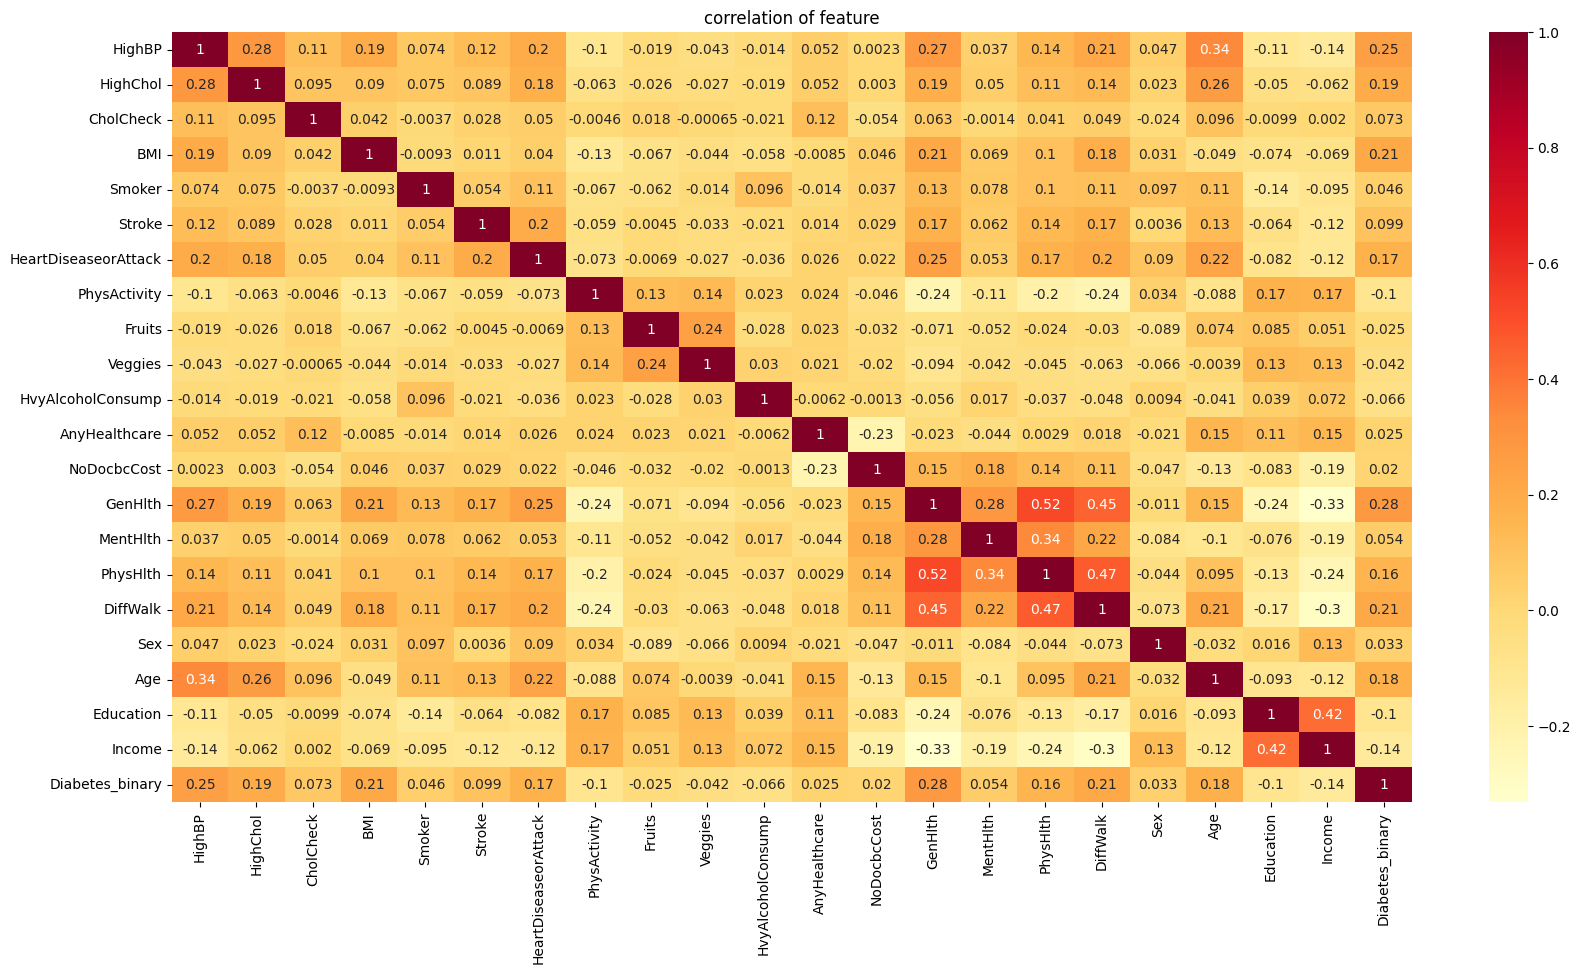

In [21]:
#using heatmap to understand correlation better in dataset data 
#Heatmap of correlation


plt.figure(figsize = (20,10))
sns.heatmap(data.iloc[:, :-1].corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

The correlation heatmap brings to light some important relationships existing among the features of this dataset, which are very essential in understanding the causes of diabetes. Strong positive correlations exist between General Health (`GenHlth`) and Physical Health (`PhysHlth`), Physical Health (`PhysHlth`) and Difficulty Walking (`DiffWalk`), and General Health (`GenHlth`) and Difficulty Walking (`DiffWalk`), meaning that a person who has poor general or physical health is more likely to have difficulty walking. On the other hand, `DiffWalk` and `Income` are highly negatively correlated, indicating that those with lower incomes are more likely to have difficulty walking, which may reflect poorer health conditions overall. This is very relevant to the project because these are major health and socio-economic factors that might influence diabetes outcomes. Understanding these correlations will provide better feature selection to make the machine learning models focus on the most impactful predictors of diabetes.

**Histogram**

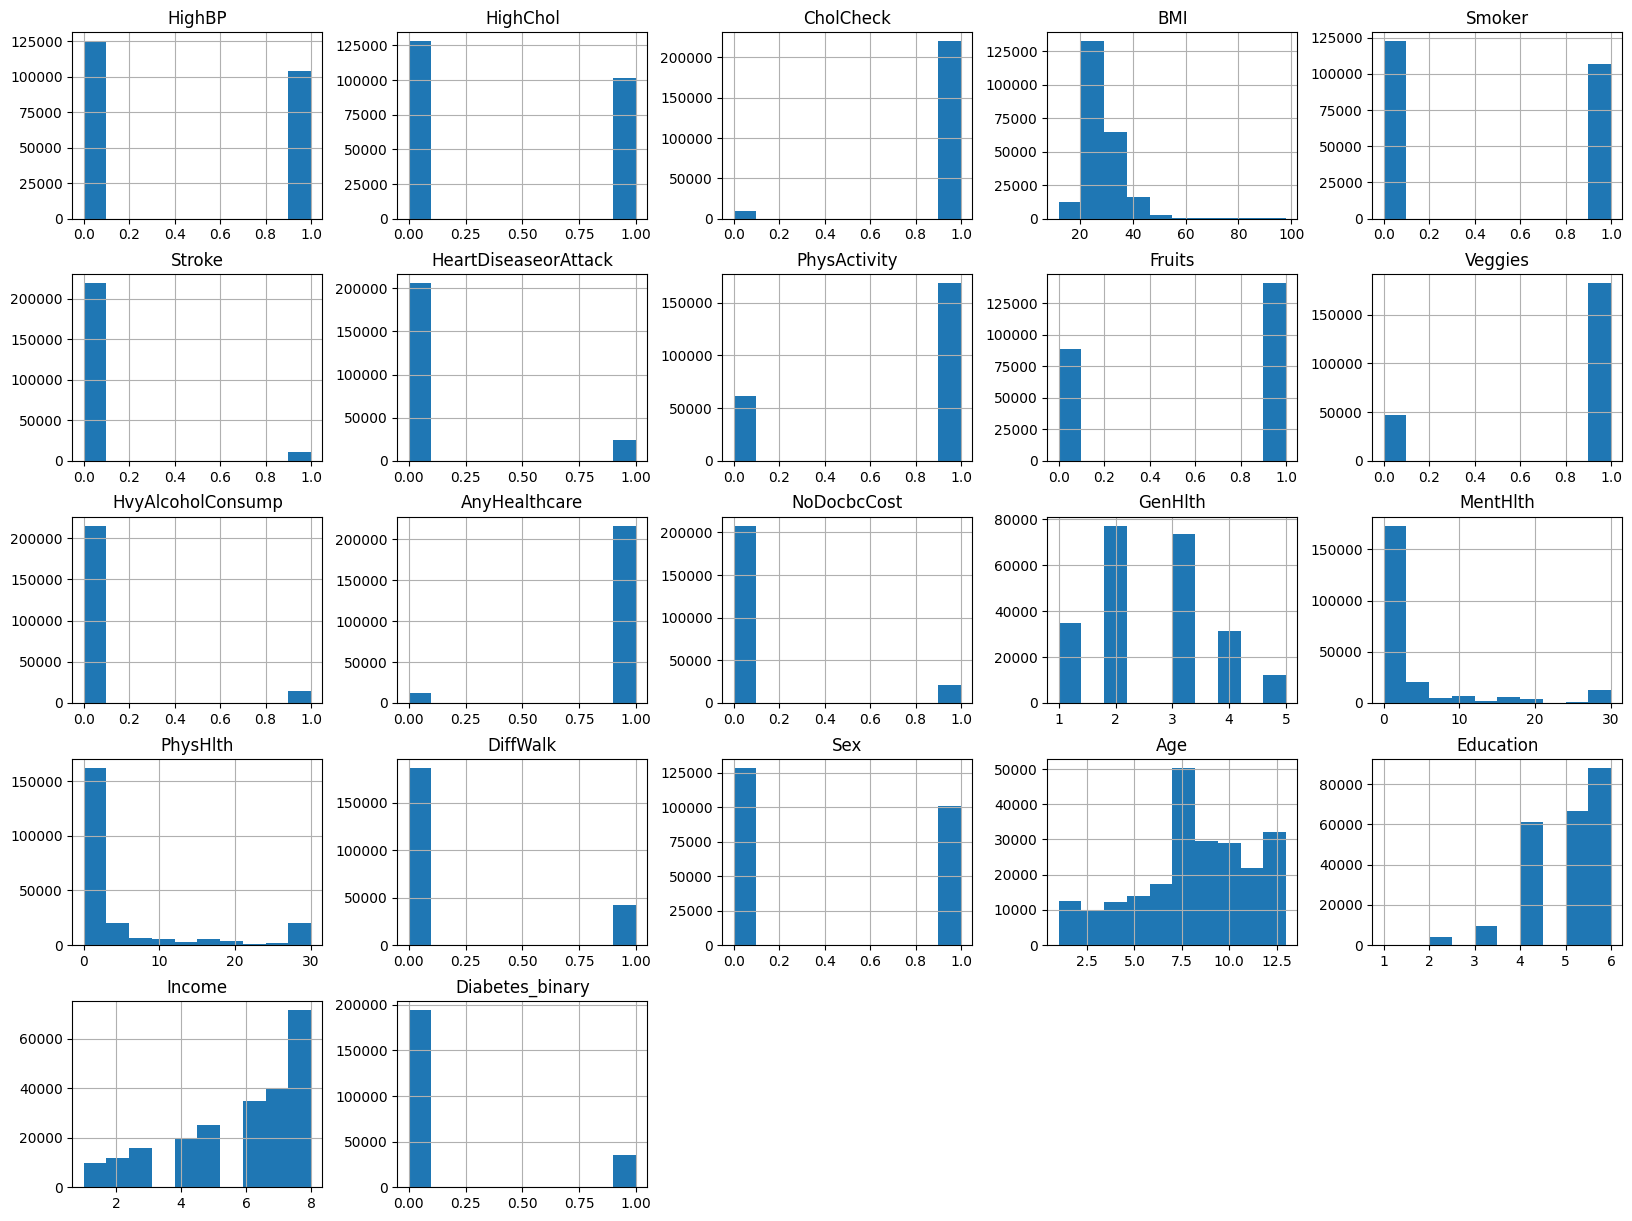

In [22]:
#using histogram to understand dataset data better

data.hist(figsize=(20,15));

These histograms give an overall picture of the distribution in various features of the data set. Some key observations are that a large number of responses have HighBP and HighChol, which are highly associated risk factors with diabetes. Most respondents have a BMI range between 20 and 40, indicating that overweight or obese individuals dominate in this data set. Features like fruits and vegetable consumption show a high proportion of people with poor dietary habits. The distribution of `Diabetes_binary` indicates that the dataset is imbalanced, with far fewer people classified as having diabetes compared to those without. This imbalance shows the need for techniques such as resampling to ensure the machine learning model performs well across both classes. These insights are critical in the understanding of the causes of diabetes and guide feature selection and preprocessing strategies in the project.

**Stacked Bar Plots**

In [23]:
cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

In [24]:
def create_plot_pivot(data2, x_column):
    """ Create a pivot table for satisfaction versus another rating for easy plotting. """
    _df_plot = data2.groupby([x_column, 'Diabetes_binary']).size() \
    .reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return _df_plot

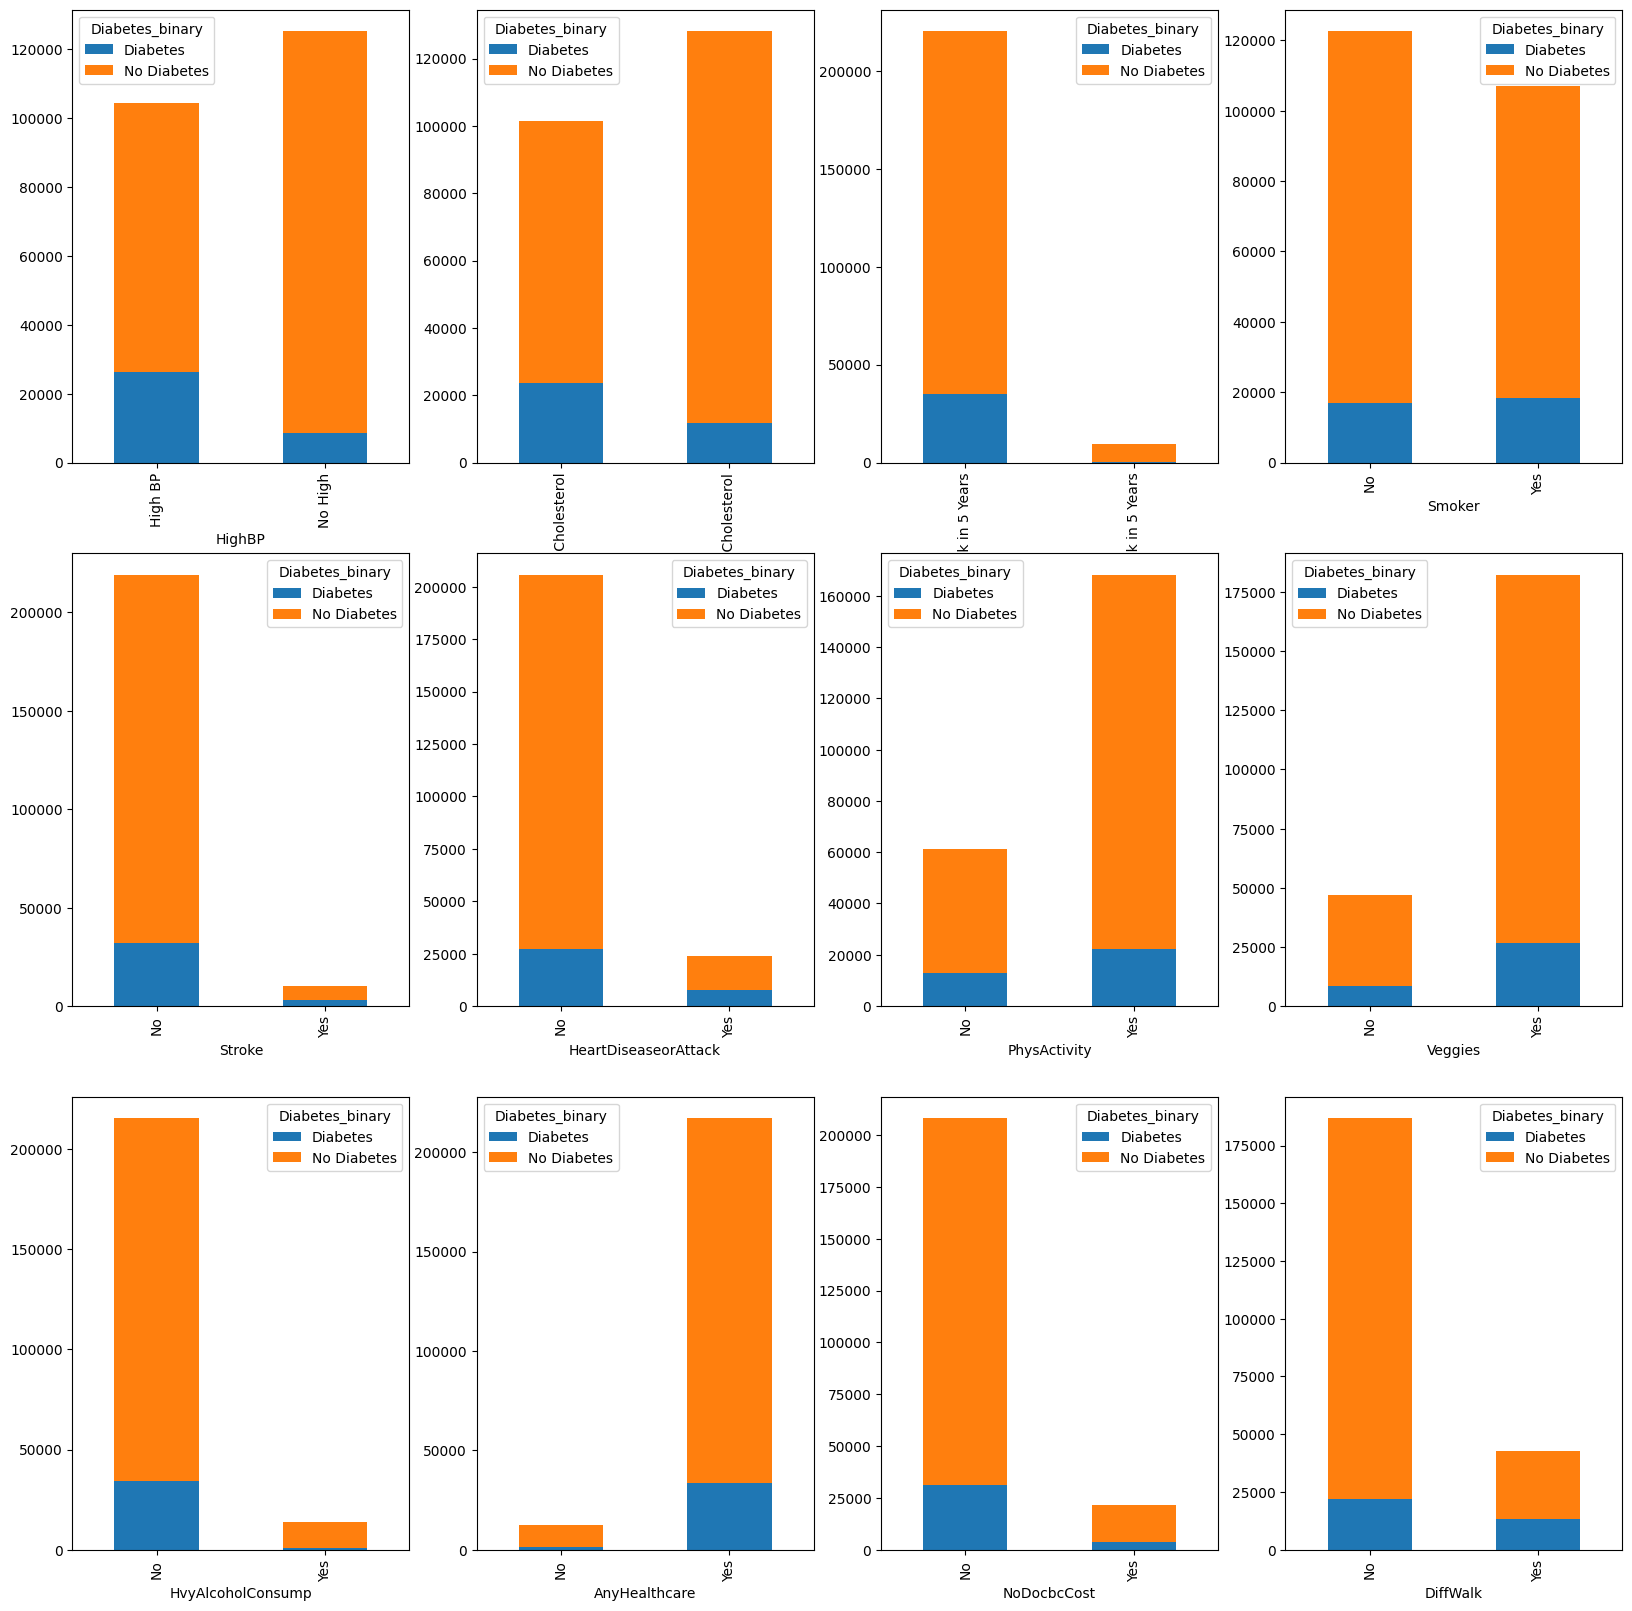

In [25]:
fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(data2, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])
    
fig.show()

Stacked bar plots have shown a big trend in the data. For example, high blood pressure (HighBP) and high cholesterol (HighChol) are over-represented in the diabetes group compared to no diabetes. Similarly, factors such as lack of physical activity (PhysActivity) and difficulty walking (DiffWalk) are strongly related to the diabetes category. On the other hand, lifestyle variables such as increased fruits and vegetable consumption are more prevalent among nondiabetic respondents; however, healthcare access factors, including healthcare availability and reduced healthcare costs, prove to be significantly different between nondiabetic and diabetic patients.

In [26]:
#average of column Daibetes_binary 
# 0 for non-Diabetic person and 1 for Diabetic person

data2["Diabetes_binary"].value_counts()

Diabetes_binary
No Diabetes    194377
Diabetes        35097
Name: count, dtype: int64

This step involves calculating the value counts for the `Diabetes_binary` column, which represents whether individuals in the dataset are diabetic (1) or non-diabetic (0). The importance of this step lies in understanding the class distribution of the target variable, which is critical for building machine learning models. The results indicate that there are 194,377 non-diabetic individuals and 35,097 diabetic individuals, highlighting a significant class imbalance. This is important because imbalance would have a negative impact on model performance, with the tendency toward bias toward the majority class. Of course, balancing this could include resampling techniques to ensure the model will generalize well for minority class instances for the task of diabetes prediction.

**Countplot**

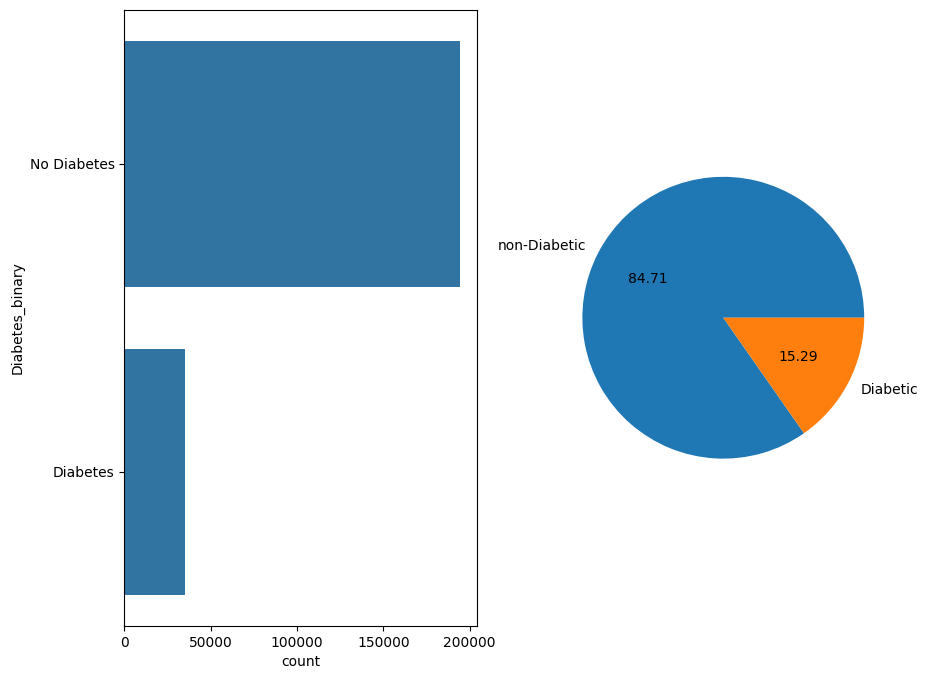

In [27]:
#checking the value count of Diabetes_binary_str by using countplot
figure1, plot1 = plt.subplots(1,2,figsize=(10,8))

sns.countplot(data2['Diabetes_binary'],ax=plot1[0])


#checking diabetic and non diabetic pepoles average by pie 

labels=["non-Diabetic","Diabetic"]

plt.pie(data2["Diabetes_binary"].value_counts() , labels =labels ,autopct='%.02f' );

We can see that healthy people is more than people with diabetes

**Boxplot**

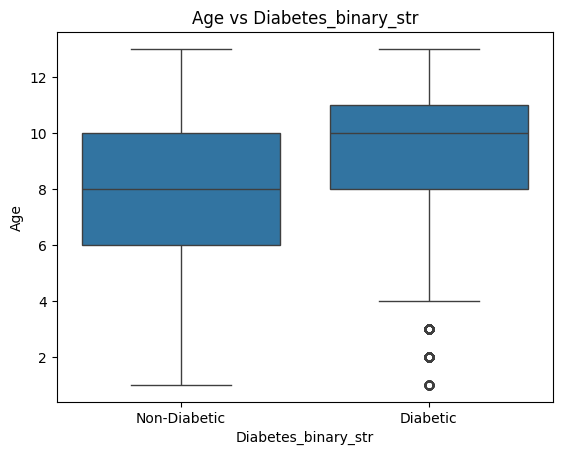

In [28]:
sns.boxplot(x = 'Diabetes_binary_str', y = 'Age', data = data)
plt.title('Age vs Diabetes_binary_str')
plt.show()

The boxplot shows that, on average, diabetic patients tend to be older than nondiabetic ones. In particular, the median age is higher for diabetics than for nondiabetics. The interquartile range for diabetic individuals is a bit narrower, which suggests their ages are more concentrated around the median. Outliers are seen in both cases, but there are many younger diabetic outliers. These are important features of the project, given that these insights feature age as one of the most influential variables for predicting diabetes, meaning the inclusion of age-related features will increase the model's accuracy and interpretability; such insight enables targeting specific age groups in healthcare interventions.

**Bar Graph**

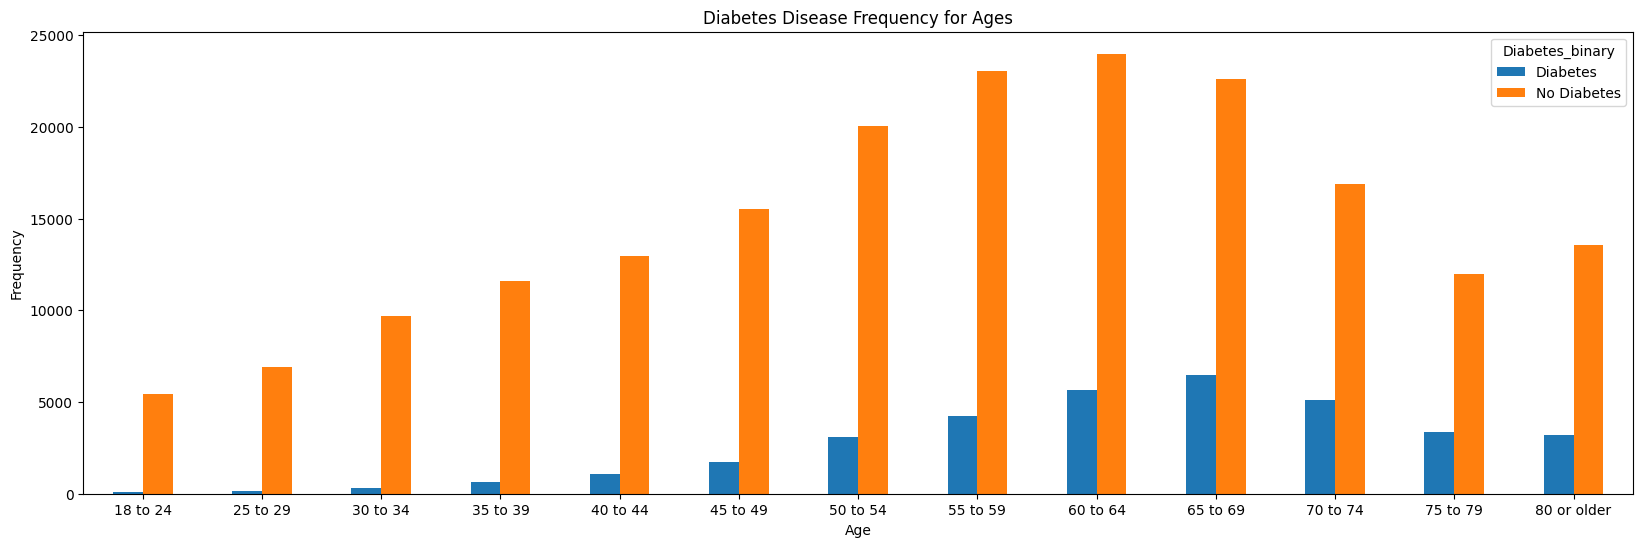

In [29]:
pd.crosstab(data2.Age,data2.Diabetes_binary).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

We know that as the age increases, the chances of diabetes also commonly increases. From above we can say, the median of the age of diabetic people is greater than that of non-diabetic people.

**Density Distribution Plot**

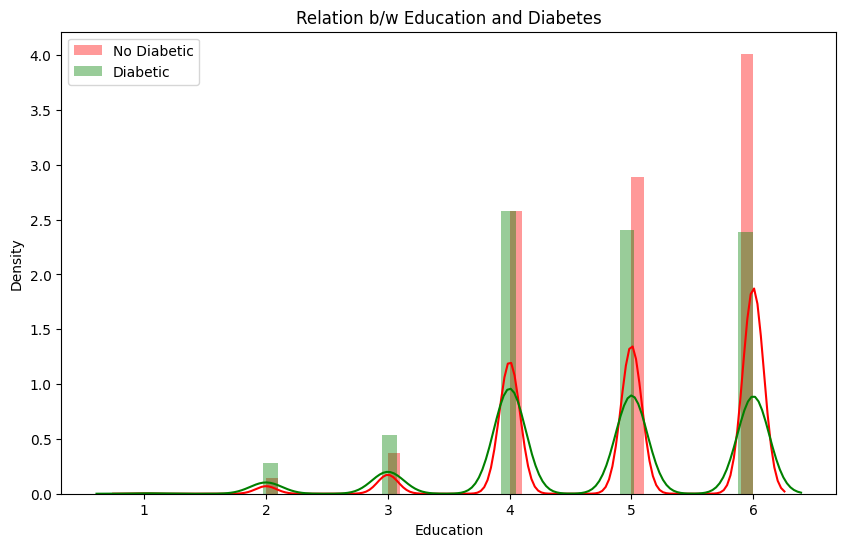

In [30]:
plt.figure(figsize=(10,6))


sns.distplot(data.Education[data.Diabetes_binary == 0], color="r", label="No Diabetic" )
sns.distplot(data.Education[data.Diabetes_binary == 1], color="g", label="Diabetic" )
plt.title("Relation b/w Education and Diabetes")

plt.legend()


The trend as deduced from this graph is: Lower-than-sufficiently schooled citizens, comprised in categories 2 and 3, enjoy nearly a quarter higher rate compared with the correctly schooled populace constituting groups 4, 5, and 6. The peaks for non-diabetic individuals are constantly higher across the education levels, but the gap is wider within the higher groups of education. These are important information findings for the project, as they give insight into how education affects diabetes risk and thus indicate that education could be one of the socio-economic determinants of diabetes prediction. This may inform targeted interventions or policy decisions that focus on decreasing the prevalence of diabetes among lower-educated populations.

**Kernel Density Estimate Plot**

Text(0.5, 1.0, 'Relation b/w Income and Diabetes')

<Figure size 2000x1000 with 0 Axes>

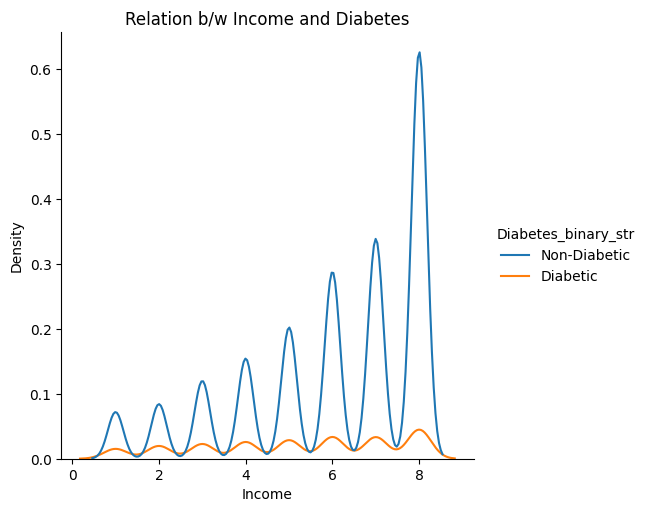

In [31]:
plt.figure(figsize=(20,10))

sns.displot(data=data, x="Income", hue="Diabetes_binary_str", kind="kde")
plt.title("Relation b/w Income and Diabetes")

The plot shows that higher income categories, such as 6, 7, and 8, are more likely to be non-diabetic. The density of diabetic people is almost the same in all income categories, with a slight fall in the highest income category. This knowledge underlines the socio-economic dependence of income on the prevalence of diabetes. Higher incomes may be associated with more availability of health care, better diets, and preventive measures for the risk of diabetes. These findings are important to the project and reinforce that income variable consideration is crucial in models of diabetes prediction and interventions.

**Bar Chart**

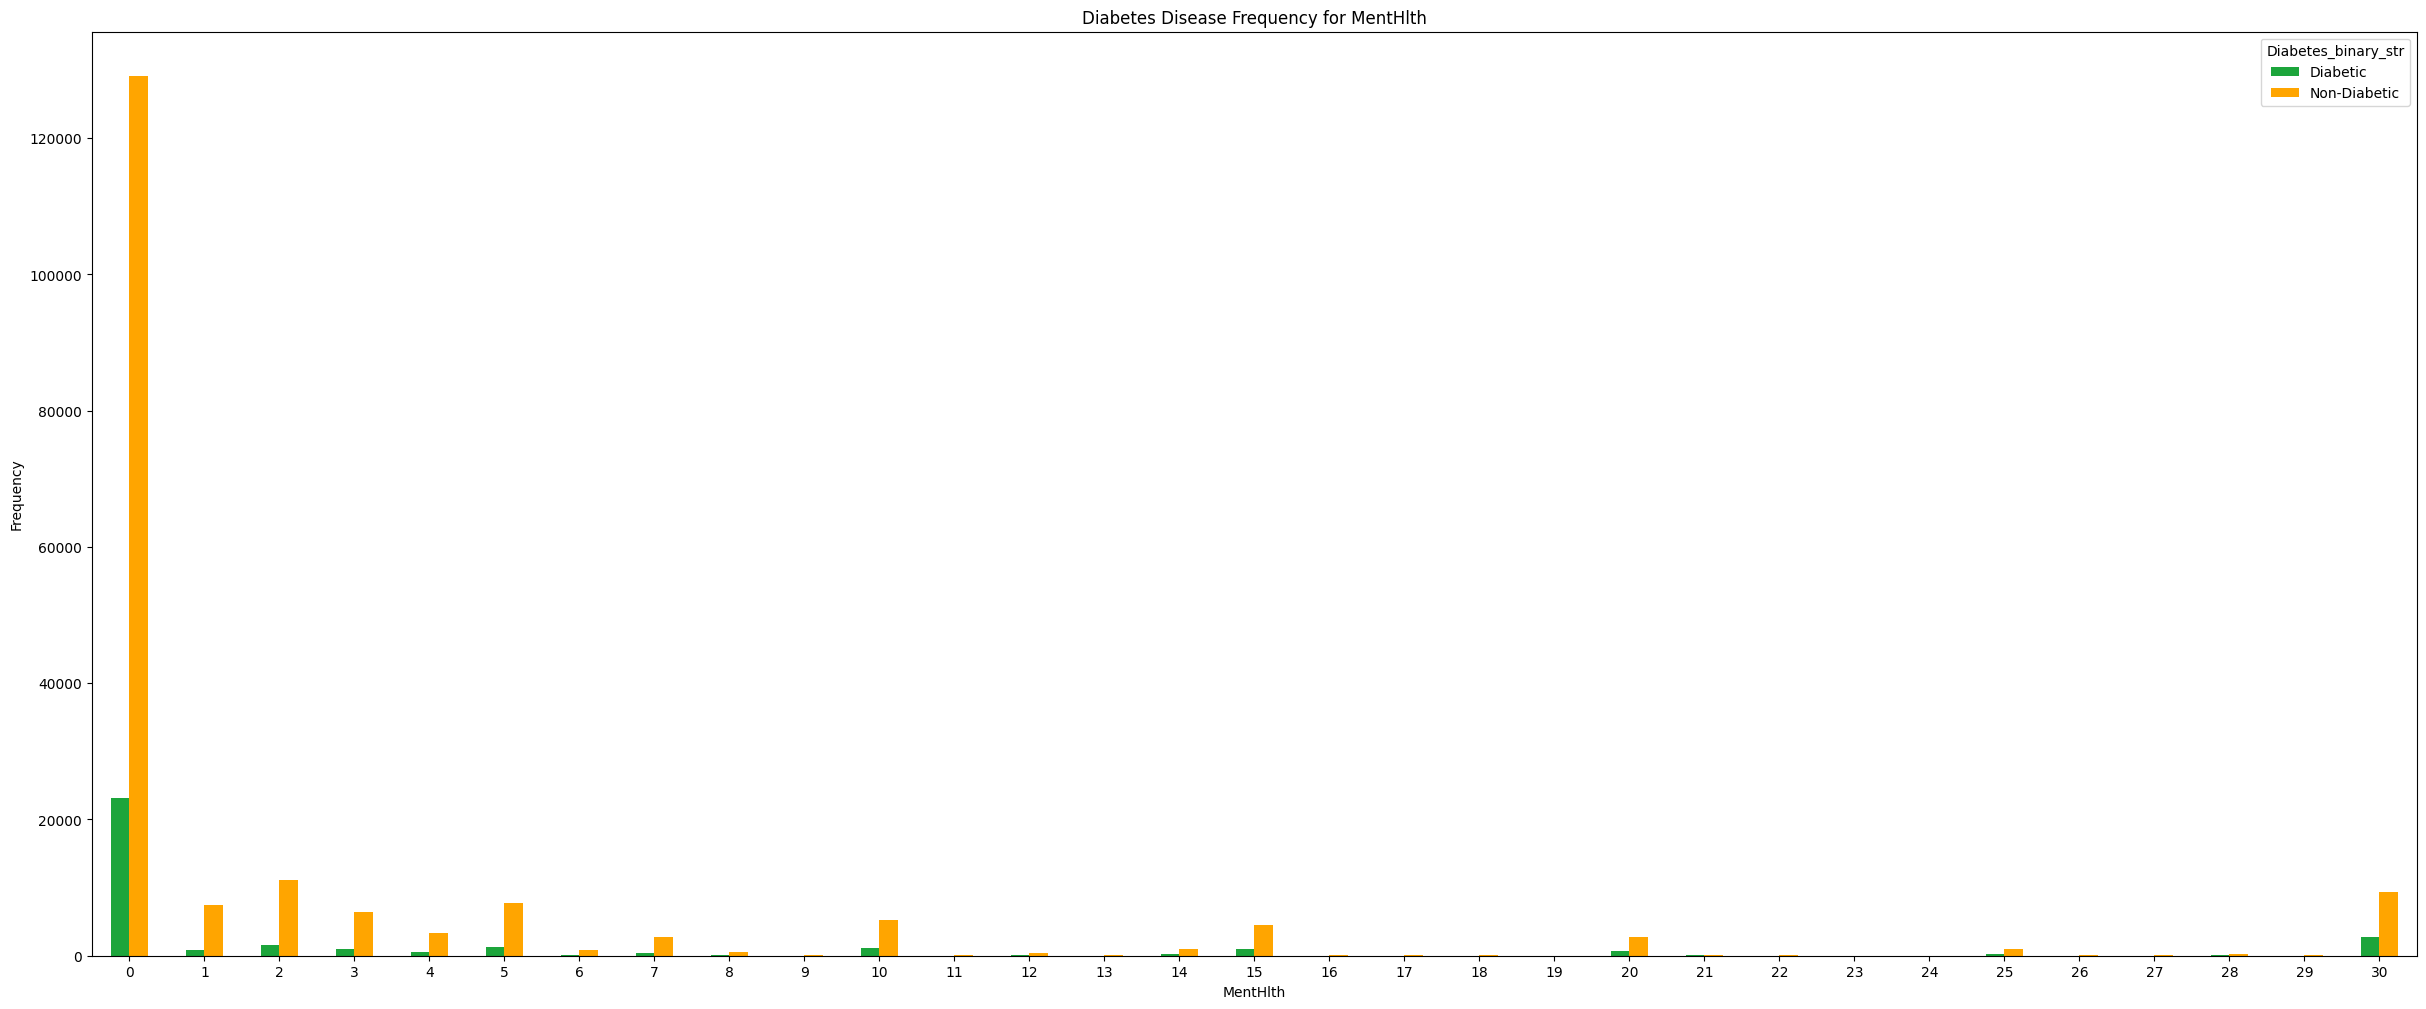

In [32]:
pd.crosstab(data.MentHlth,data.Diabetes_binary_str).plot(kind="bar",figsize=(30,12),color=['#1CA53B', '#FFA500' ])
plt.title('Diabetes Disease Frequency for MentHlth')
plt.xlabel('MentHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

This step will analyze the relation between mental health days and diabetes frequency by using a bar chart to observe the pattern of how mental health affects diabetes prevalence.

The chart illustrates that people with fewer mental health issues (lower "MentHlth" values) are predominantly non-diabetic, while those experiencing more mental health days per month (higher "MentHlth" values) have a relatively higher proportion of diabetes. This stark contrast in frequency between diabetic and non-diabetic at lower mental health values draws out the relationship between better mental health and low risk of diabetes. This is very important to the project because it emphasizes the need for mental health as one of the predictors of the diabetes risk models and means that improving mental health can be another way to reduce the risk and manage the disease.

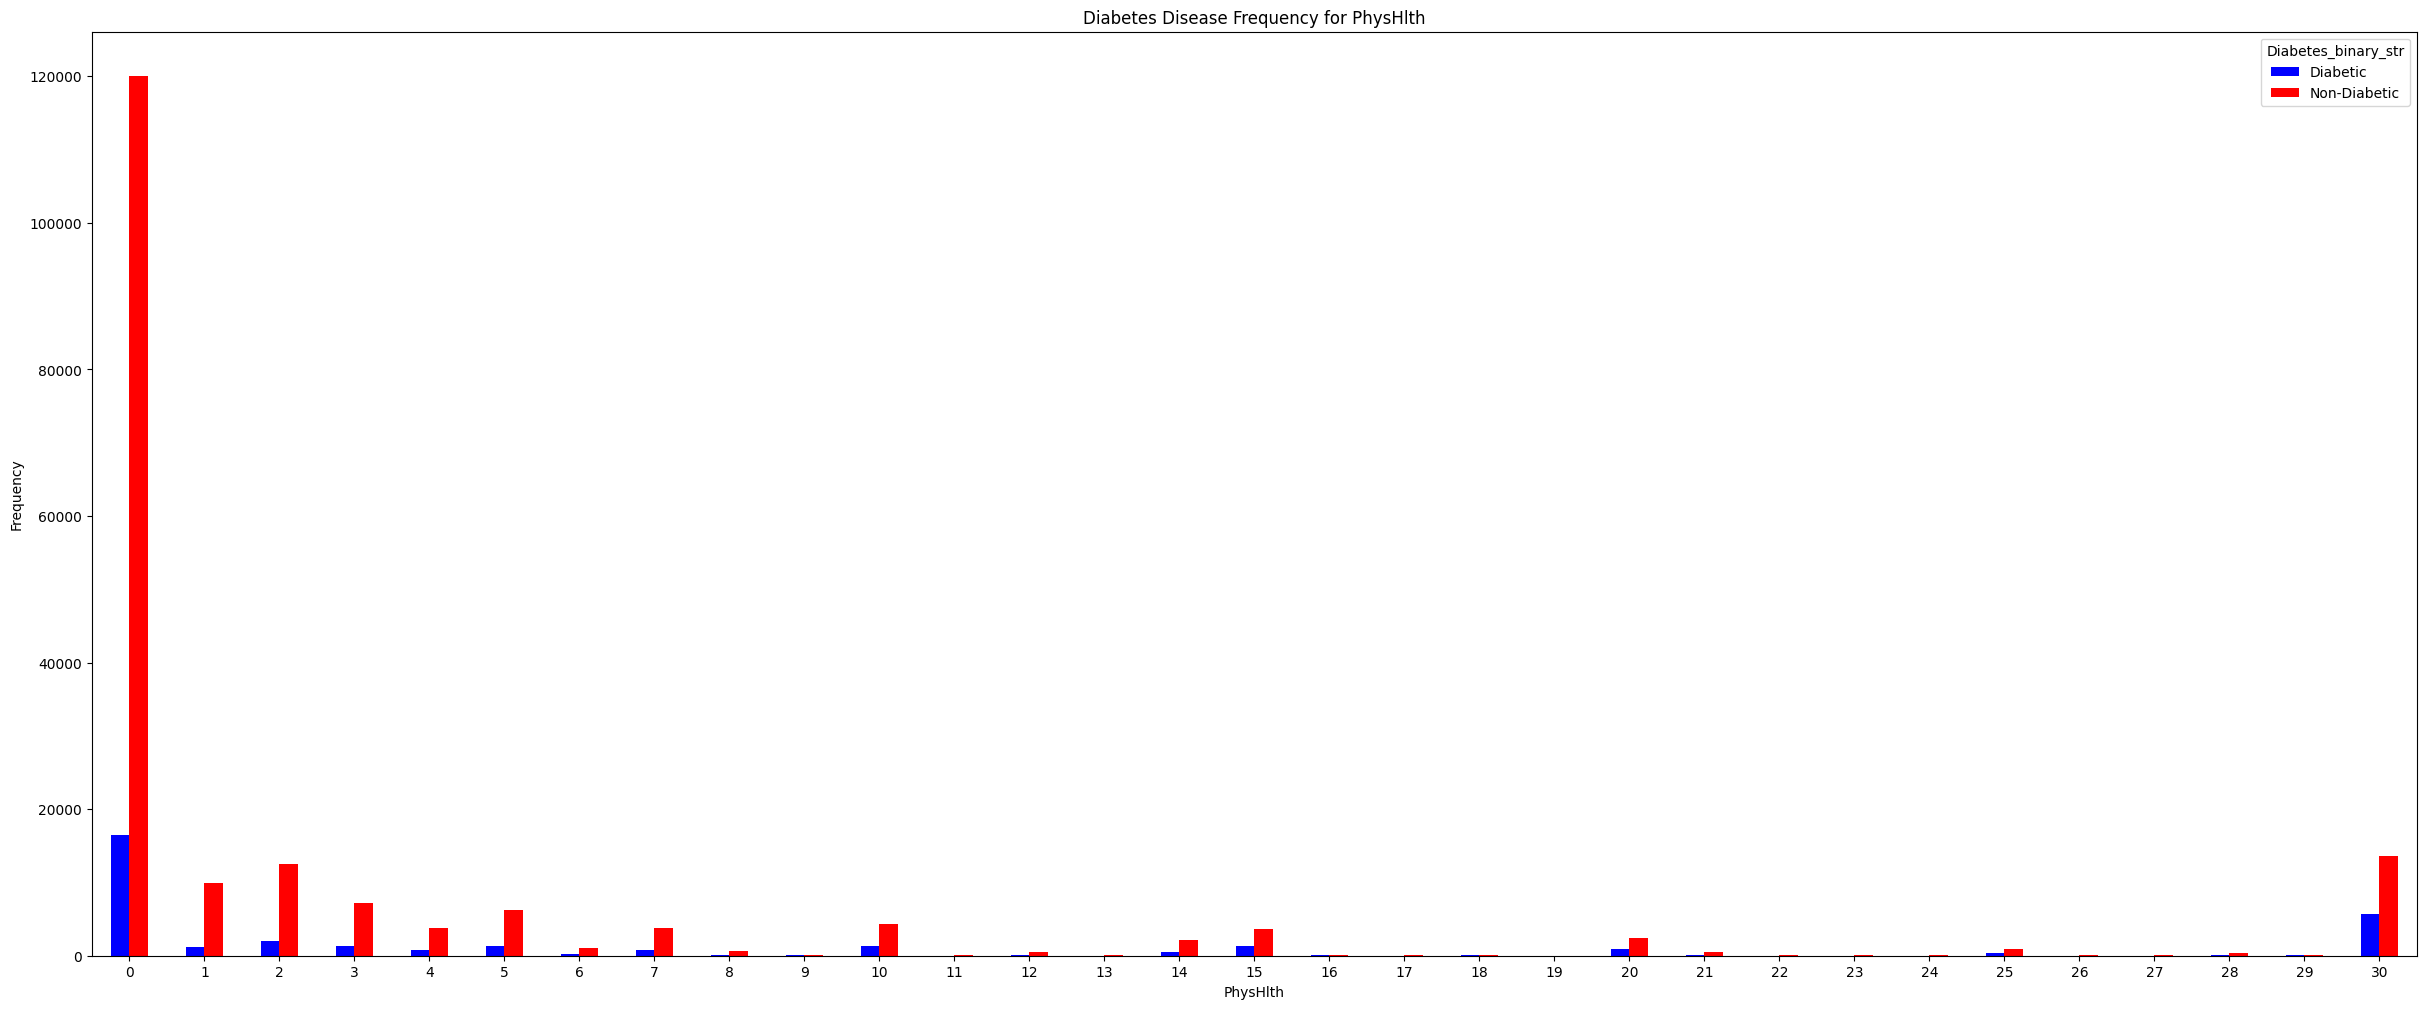

In [33]:
pd.crosstab(data.PhysHlth,data.Diabetes_binary_str).plot(kind="bar",figsize=(30,12),color=['Blue', 'Red' ])
plt.title('Diabetes Disease Frequency for PhysHlth')
plt.xlabel('PhysHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

The bar chart above indicates that the people with low values of PhysHlth are mostly non-diabetic whereas when PhysHlth increases -meaning poor physical health was reported for more days every month- the number of cases of diabetes increases. Particularly, diabetes among people with bad physical health (PhysHlth = 30) is much higher compared to the rest. These points are very important for the project, as they underscore that poor physical health is strongly related to diabetes and thus may serve as critical predictors in models estimating the risk of diabetes. This will enhance the promotion of physical well-being in diabetes prevention strategies.

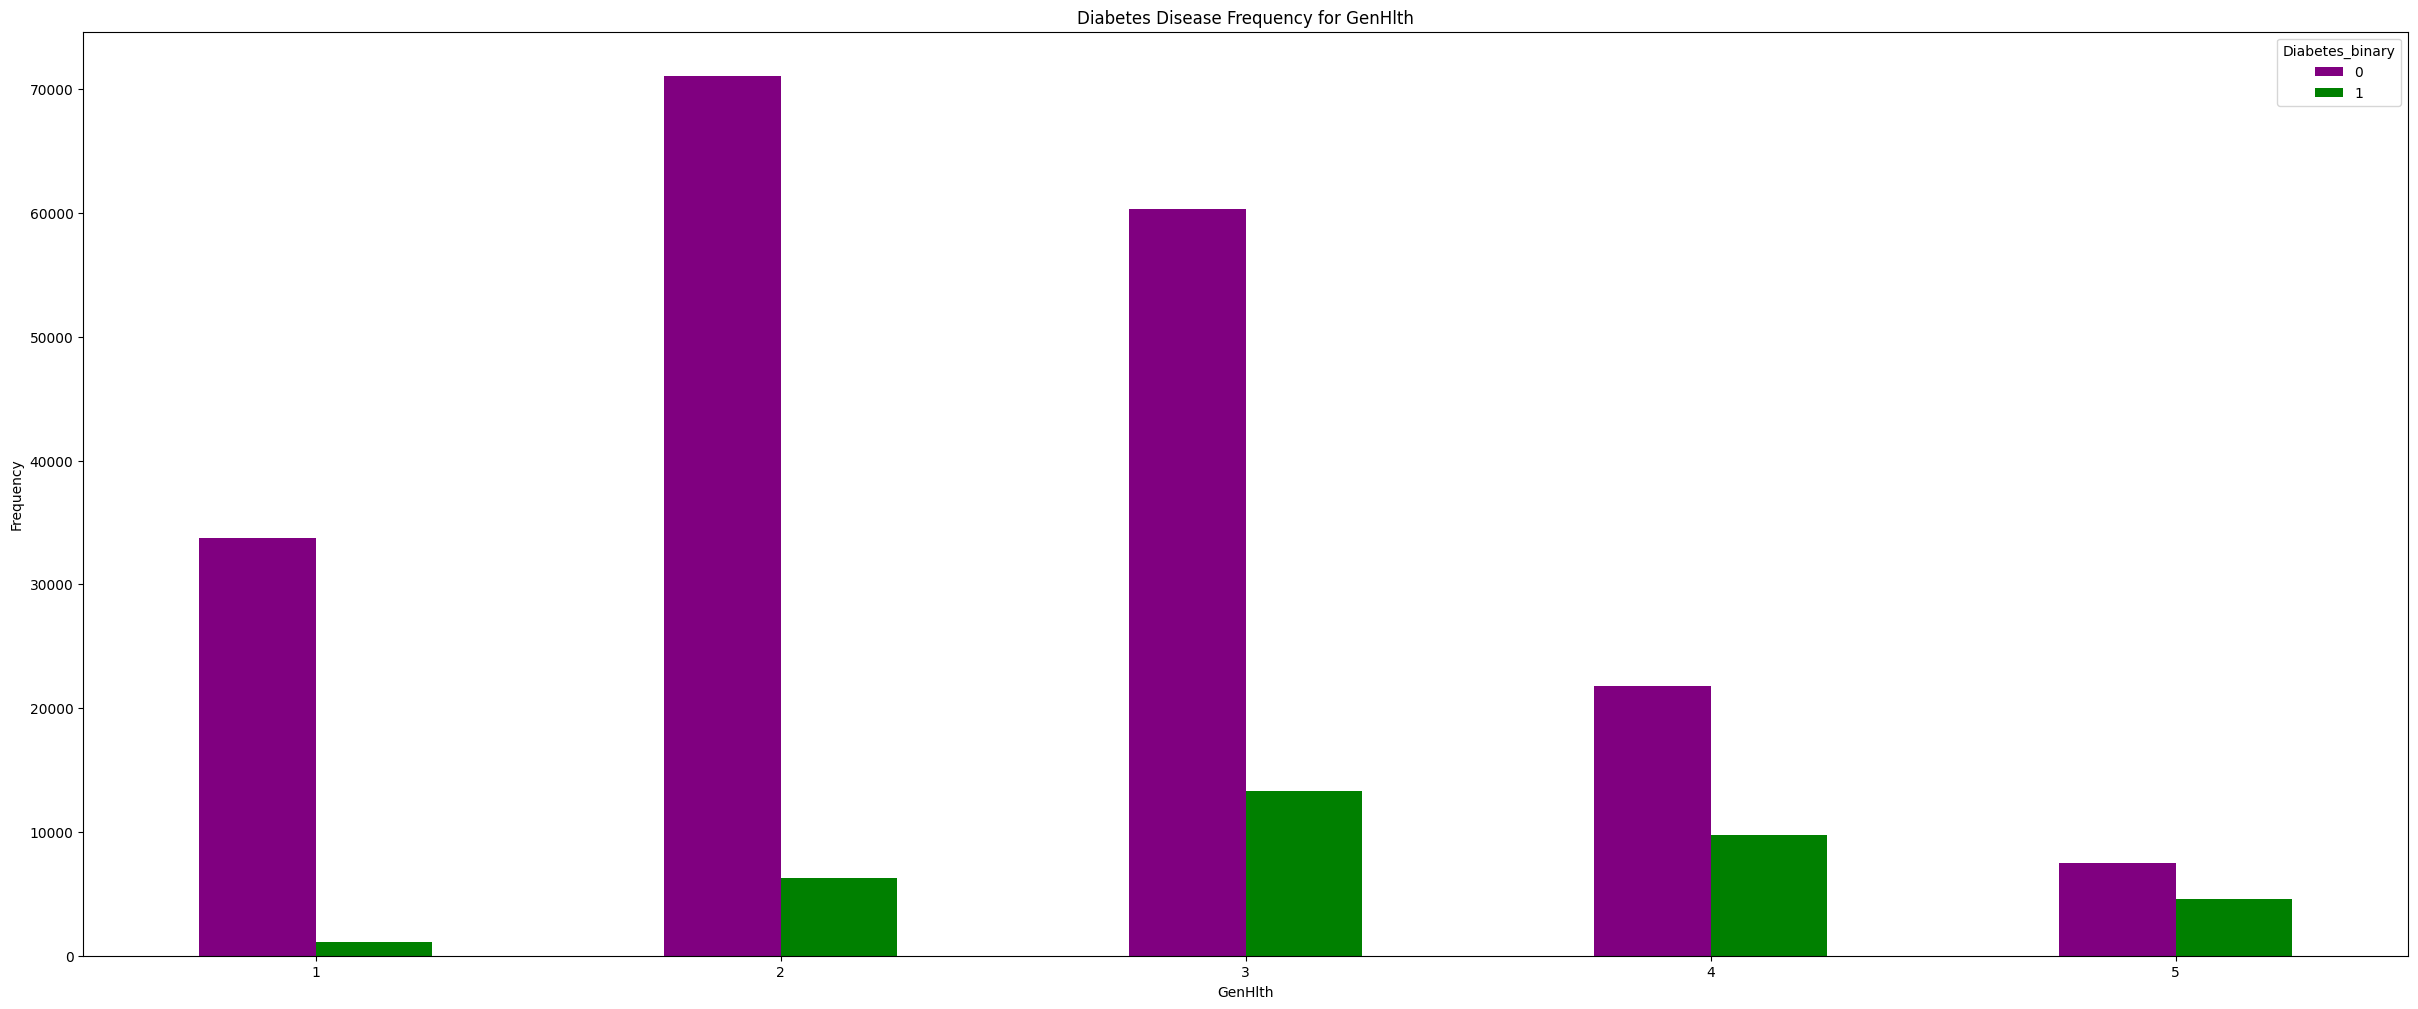

In [34]:
pd.crosstab(data.GenHlth,data.Diabetes_binary).plot(kind="bar",figsize=(30,12),color=['Purple', 'Green' ])
plt.title('Diabetes Disease Frequency for GenHlth')
plt.xlabel('GenHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

The bar chart shows a strong inverse relationship between general health (GenHlth) and diabetes. Individuals reporting better general health (GenHlth = 5, labeled as "Excellent") have a significantly lower frequency of diabetes compared to those with poor general health (GenHlth = 1, labeled as "Poor"). As general health decreases, the prevalence of diabetes increases, with a notable rise in diabetic cases among those with the lowest GenHlth ratings. These insights are pivotal to the project, as they highlight the importance of overall health in diabetes prevention. Incorporating general health metrics into predictive models can improve accuracy in identifying at-risk populations and guide interventions targeting broader health improvements to reduce diabetes risk.

**Feature Selection**

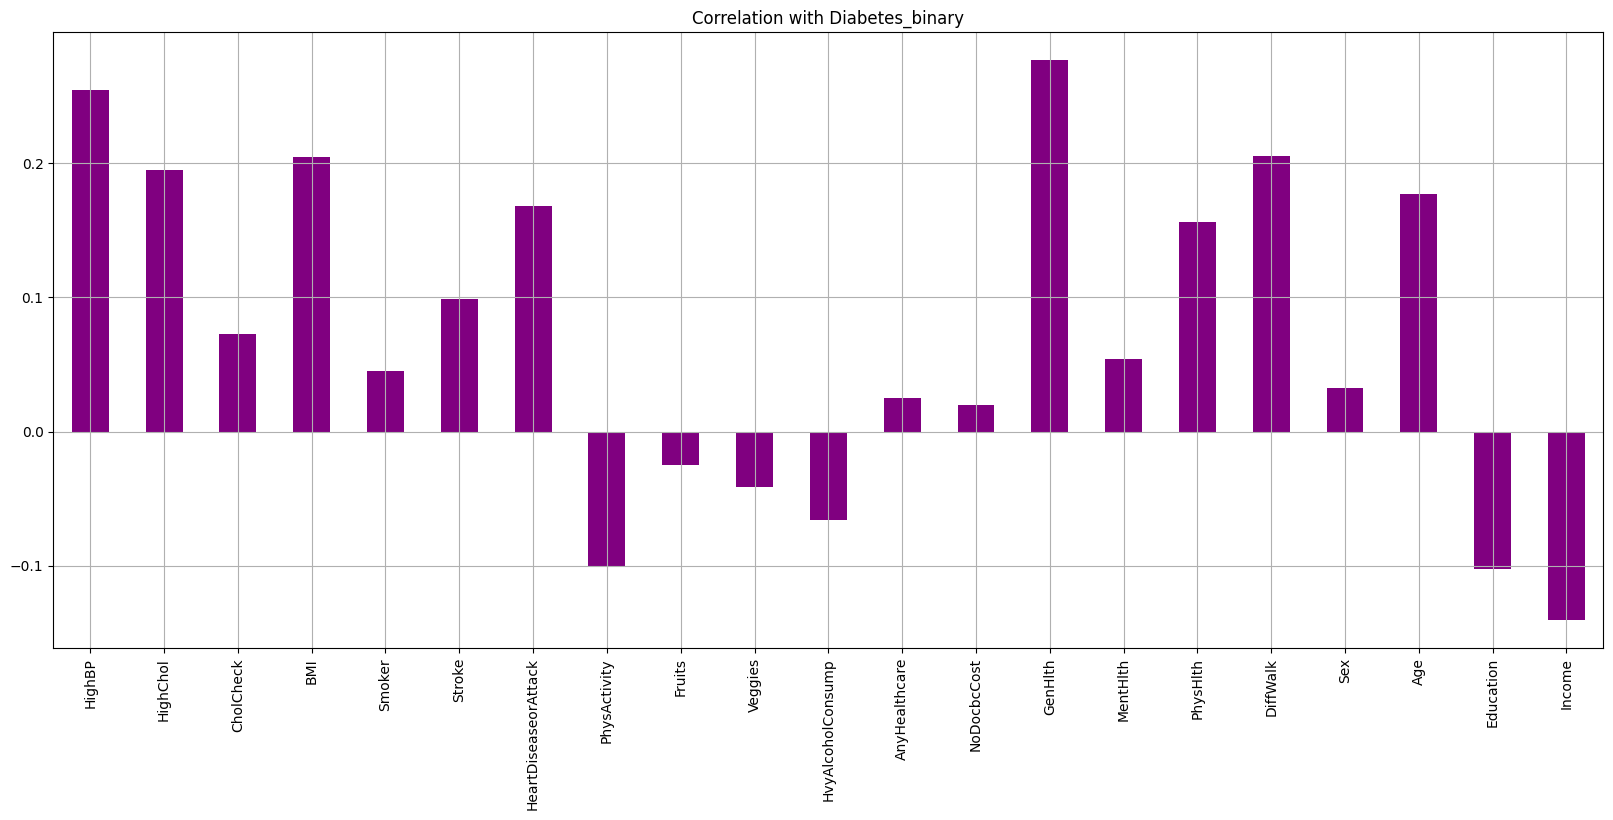

In [35]:
data.drop(['Diabetes_binary_str', 'Diabetes_binary'], axis=1).corrwith(data.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes_binary",color="Purple");


The bar graph reveals that features such as GenHlth, HighBP, BMI, and PhysHlth exhibit strong positive correlations with diabetes, indicating they are key predictors of the condition. Conversely, features like Income and Education show negative correlations, suggesting that higher socioeconomic factors might reduce the risk of diabetes. This step is crucial as it highlights the features with the most predictive power, allowing for the selection of significant variables while eliminating less relevant ones. Incorporating these insights into the modeling process will enhance the accuracy and interpretability of the diabetes prediction model by focusing on the most impactful factors.

In [36]:
data.drop("Diabetes_binary_str", axis = 1, inplace = True)

**Chi Squared Statistical Test**

This step was performed to identify and rank the top 20 features with the highest statistical relevance to the target variable (Diabetes_binary) using the SelectKBest feature selection method and the Chi-Squared statistical test.

In [37]:
#apply SelectKBest class to extract top 10 best features

X = data.iloc[:, :-1]
Y = data.iloc[:, -1]
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Feature','Score']

f_Scores

,Feature,Score
0,HighBP,8098.548237
1,HighChol,4869.312739
2,CholCheck,48.904140
3,BMI,15507.736174
4,Smoker,253.826098
5,Stroke,2156.678382
6,HeartDiseaseorAttack,5822.145697
7,PhysActivity,617.563886
8,Fruits,54.688897
9,Veggies,82.098846


In [38]:
print(f_Scores.nlargest(16,'Score'))

                 Feature         Score
15              PhysHlth  97988.761672
3                    BMI  15507.736174
14              MentHlth  11419.584750
18                   Age   8539.906340
0                 HighBP   8098.548237
16              DiffWalk   7875.496177
13               GenHlth   7671.732832
6   HeartDiseaseorAttack   5822.145697
1               HighChol   4869.312739
20                Income   3377.099257
5                 Stroke   2156.678382
10     HvyAlcoholConsump    937.401148
7           PhysActivity    617.563886
19             Education    479.112939
4                 Smoker    253.826098
17                   Sex    137.837135


The results highlight the most significant predictors of diabetes, with PhysHlth, BMI, and MentHlth emerging as the top contributors, indicating the crucial role of physical and mental health in identifying diabetes risks. Factors like Age, HighBP, DiffWalk, and GenHlth also show strong associations, reflecting the impact of aging, mobility challenges, and self-reported health status on diabetes. Additionally, variables like HighChol and HeartDiseaseorAttack suggest that lipid levels and cardiovascular comorbidities are important indicators of the disease. In contrast, features like Sex, Smoker, and Education have weaker associations, showing less predictive power. These insights inform the feature selection process for model development, ensuring a focus on the most impactful variables, improving the model's accuracy and relevance, and aligning with known medical risk factors for diabetes.

# Model Development 

Model development is a crucial phase of this project as it transitions the analysis from exploration to prediction. This is the case in the project, which intends to predict accurately the status of diabetes based on several health-related features. By deploying machine learning models like Random Forest and SVM, this project gauges the strength of the selected features for prediction. This step allows the identification of the relationship between independent variables, such as physical health, mental health, and BMI, with the target variable of diabetes status. The different evaluation metrics used, such as accuracy, mean squared error, and confusion matrices, provide insight into the performance of the models. This process is very necessary in developing a robust and interpretable predictive system that can assist in early diagnosis of diabetes, improving health outcomes, and emphasizing preventive measures.


In [40]:
colomns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare"]

In [41]:
data.drop(colomns , axis= 1 ,inplace=True)

Columns such as Fruits, Veggies, Sex, CholCheck, and AnyHealthcare were dropped to focus on the most impactful features. This step ensures the model's input is concise and avoids noise that can degrade predictive accuracy.

In [42]:
Y.value_counts()

Diabetes_binary
0    194377
1     35097
Name: count, dtype: int64

In [44]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 10)

x_sm,y_sm= nm.fit_resample(X,Y)

Diabetes is inherently imbalanced in this dataset, as observed in the value counts. The NearMiss undersampling technique was applied to balance the classes, which helps the model better distinguish between diabetic and non-diabetic individuals. This is critical because imbalanced data often leads to models biased toward the majority class, reducing performance on the minority class.

In [45]:
y_sm.shape , x_sm.shape

((70194,), (70194, 21))

In [46]:
y_sm.value_counts()

Diabetes_binary
0    35097
1    35097
Name: count, dtype: int64

In [47]:
X_train , X_test , Y_train , Y_test = train_test_split(x_sm,y_sm, test_size=0.3 , random_state=69)

The data was split into training and testing sets using train_test_split. This ensures that the model can be trained and tested on separate data, allowing an unbiased evaluation of its generalization performance.

In [48]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

The StandardScaler was used to standardize the feature values. Scaling is important for machine learning models, especially those sensitive to feature magnitudes (e.g., SVM), as it ensures all features contribute equally to the model's decision-making process.

**1. Random Forest Model**

In [49]:
rf = RandomForestClassifier(max_depth=12 ,n_estimators =10, random_state=42 )

# fitting the model on the train data
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=12, n_estimators=10, random_state=42)

The RandomForestClassifier was trained with specific hyperparameters (max_depth=12, n_estimators=10) to ensure a balance between model complexity and computational efficiency. The classifier was trained on a balanced dataset created using the NearMiss undersampling technique to handle the original class imbalance problem. This ensures the model is not biased toward the majority class.

In [50]:
# make predictions on test set
y_pred=rf.predict(X_test)

print('Training set score: {:.4f}'.format(rf.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(rf.score(X_test, Y_test)))

Training set score: 0.8700
Test set score: 0.8577


The training and test scores indicate that the model achieves good performance, with the test score being (0.8577) slightly lower than the training score (0.8700), suggesting limited overfitting. This validates the model's ability to generalize to unseen data.

# Model Evaluation and Validation

In [51]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.1422669642433164
Root Mean Squared Error : 0.3771829320678713


The Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) provide a measure of the model's prediction accuracy. Lower values indicate that the model's predictions closely match the actual values.

In [52]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.80      0.95      0.87     10463
           1       0.94      0.76      0.84     10596

    accuracy                           0.86     21059
   macro avg       0.87      0.86      0.86     21059
weighted avg       0.87      0.86      0.86     21059



Metrics such as precision, recall, and F1-score were evaluated for both classes. The model shows strong performance in identifying the majority class (Non-Diabetic) but slightly lower recall for the minority class (Diabetic), indicating room for improvement in identifying diabetic cases.

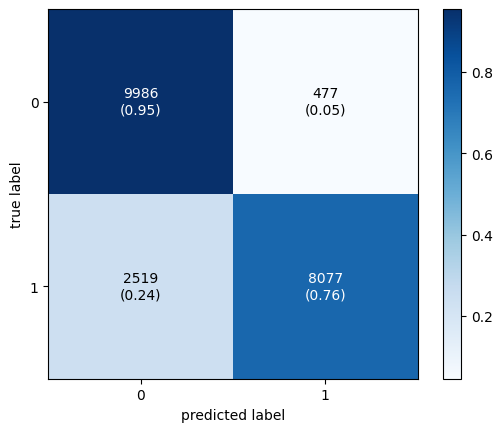

In [53]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

The confusion matrix provides a breakdown of predictions. It highlights that while the model accurately predicts most cases, there are some false negatives for the diabetic class (misclassifying diabetics as non-diabetics). This is a critical insight as identifying diabetics correctly is vital for the project's goal of predicting diabetes.

These steps were important to build a strong and interpretable model for the accurate prediction of diabetes. Handling class imbalance and checking the performance with various metrics will make the classifier appropriate for real-world applications. Insights like false negatives and class-specific recall pinpoint areas to concentrate on, such as the improvement of diabetic detection, which comes in line with the project objective of supporting healthcare predictions effectively.

**2. SVM**

In [54]:
from sklearn.svm import SVC

# define the model
clf = SVC(kernel='rbf', C=1.0)

# train the model
clf.fit(X_train, Y_train)

y_pred=clf.predict(X_test)

print('Training set score: {:.4f}'.format(clf.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, Y_test)))

Training set score: 0.8684
Test set score: 0.8632


The training and test accuracy scores (86.84% and 86.32%, respectively) indicate that the SVM model is performing consistently, with minimal overfitting. 

In [55]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.13675863051426942
Root Mean Squared Error : 0.3698089108097173


The calculated Mean Squared Error (0.1368) and Root Mean Squared Error (0.3698) are relatively low, signifying a reasonable fit of the model to the data.

In [56]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.80      0.96      0.87     10463
           1       0.95      0.77      0.85     10596

    accuracy                           0.86     21059
   macro avg       0.88      0.86      0.86     21059
weighted avg       0.88      0.86      0.86     21059



The precision for diabetic prediction is 95%, indicating that among all predicted diabetics, 95% were correct. However, the recall for diabetics is 77%, suggesting that the model misses about 23% of actual diabetic cases. The F1-scores (0.87 and 0.85 for the two classes) indicate a balance between precision and recall.

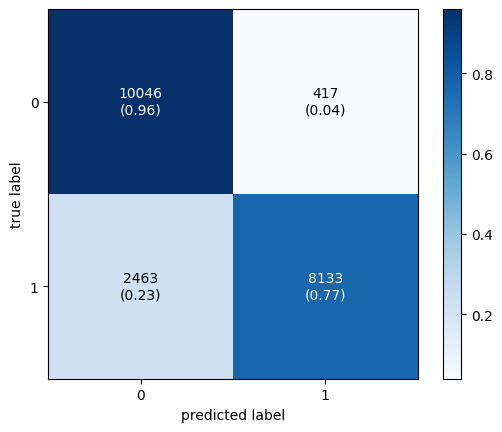

In [57]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

The confusion matrix shows that 96% of non-diabetic individuals (True Negative Rate) were correctly classified, while 77% of diabetic individuals (True Positive Rate) were correctly identified. This highlights that the model performs well in classifying non-diabetic individuals but slightly struggles with diabetic classifications, as seen by a higher false-negative rate for diabetics.

# Interpretation: Insight and Policy Decision




This is the stage in the data science life cycle where the results of our analysis and modeling are used to glean meaningful insights and actionable policies. Based on our extensive review of the data, along with the machine learning models applied, we may infer the following:

1. An increased frequency of physical inactivity, poor mental health, and general health complaints relates more to being classified as diabetic. These results confirm that lifestyle and psychosocial factors are crucially involved in the management of diabetes risks.

2. Stronger features related to the prevalence of diabetes include BMI, high blood pressure, and age. These can be targeted for early screening and preventive interventions within at-risk groups.

3. Among the applied classification models, Random Forest and SVM performed well, classifying diabetic subjects with an accuracy of more than 85%, hence proving the feasibility of using machine learning for efficient and scalable diabetes prediction.

These insights are crucial to healthcare policymakers in prioritizing the promotion of physical activity and mental well-being, coupled with targeted interventions for high-risk populations. These models could also be used by providers to develop personalized care for patients based on predictive analytics.

This might be further improved by increasing the sample size and including more demographics and other health indicators in future datasets to enhance generalizability and precision of the model. Moreover, using temporal data may be used for monitoring the trend and, hence, predicting the prevalence of diabetes with better accuracy.

The Data Science pipeline from data processing through machine learning provides a concrete way of applying predictive analytics on a real-world health problem to empower data-driven decisions on public health.